Name: Jonathan Mazurkiewicz <BR>
Z#: Z23641903 <br>
Link: https://colab.research.google.com/drive/1wGs_2wyEe3qA7Hea_NcfuKoilLsvOfUn?usp=sharing<br>
Assignment 5 <br>


Much time was taken to ensure that all images showed properly in the PDF. If you see large chunks of blank spaces, it was for this purpose. I could not find another way to achieve this effect.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


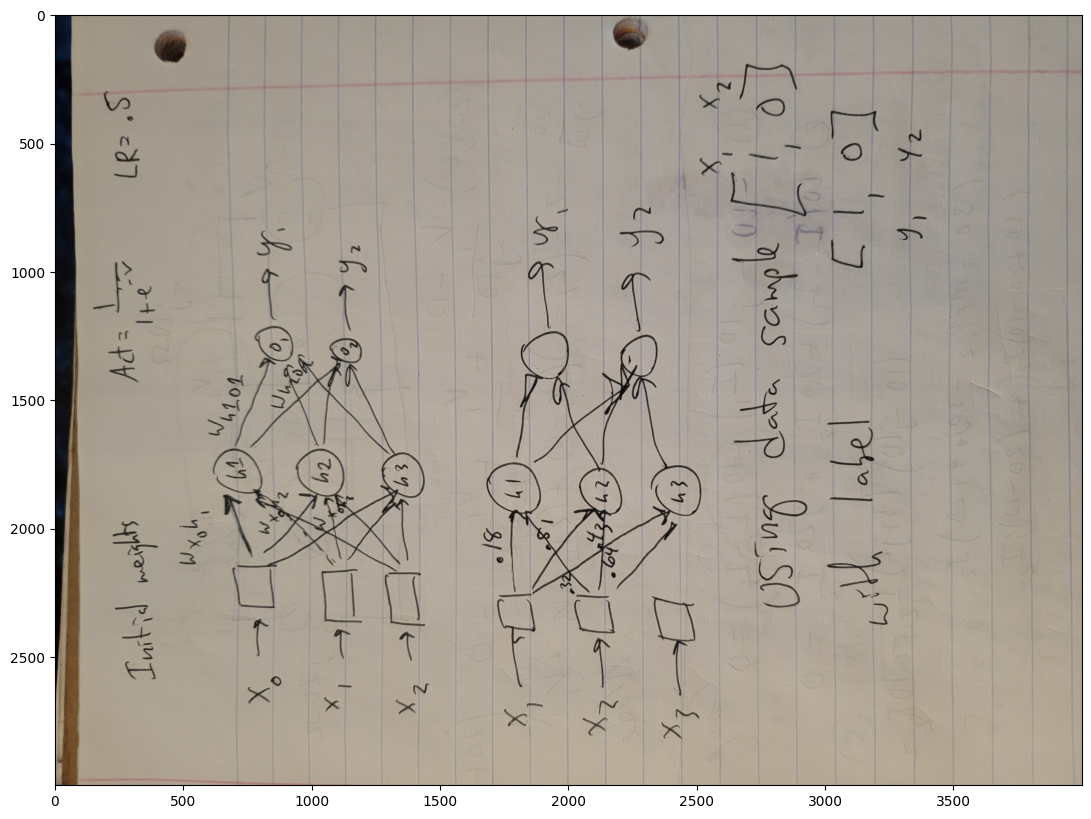

In [ ]:
#Handwritten portion of the assignment

#I have double and triple checked, the images are upright when downloaded. I have no idea why they are rotated 90 degrees in colab.
#If this issue persists, please download the images to see them properly. I apologize for any inconvenience.

from google.colab import drive
drive.mount('/content/drive')


import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
img1 = mpimg.imread('/content/drive/MyDrive/assignment5_part1.jpg')
img2 = mpimg.imread('/content/drive/MyDrive/assignment5_part2.jpg')
img3 = mpimg.imread('/content/drive/MyDrive/assignment5_part3.jpg')
img4 = mpimg.imread('/content/drive/MyDrive/assignment5_part4.jpg')
img5 = mpimg.imread('/content/drive/MyDrive/assignment5_part5.jpg')
img6 = mpimg.imread('/content/drive/MyDrive/assignment5_part6.jpg')

plt.figure(figsize = (15, 10))
plt.imshow(img1)


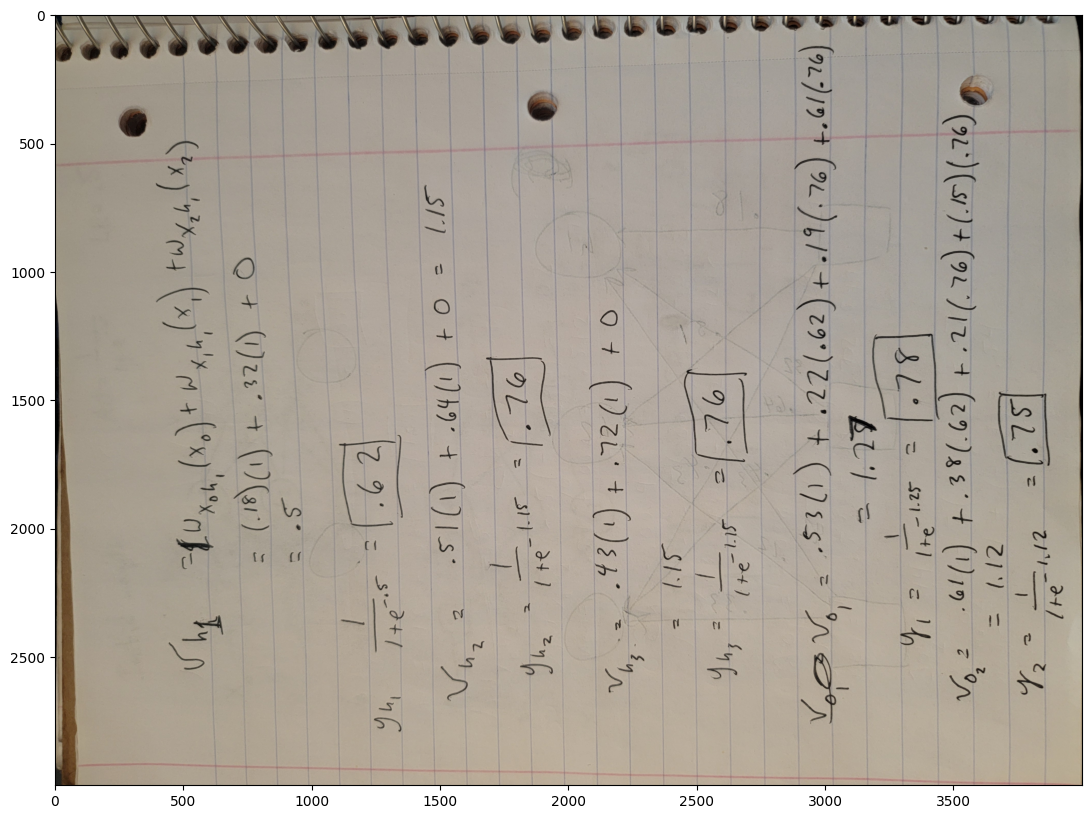

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img2)




































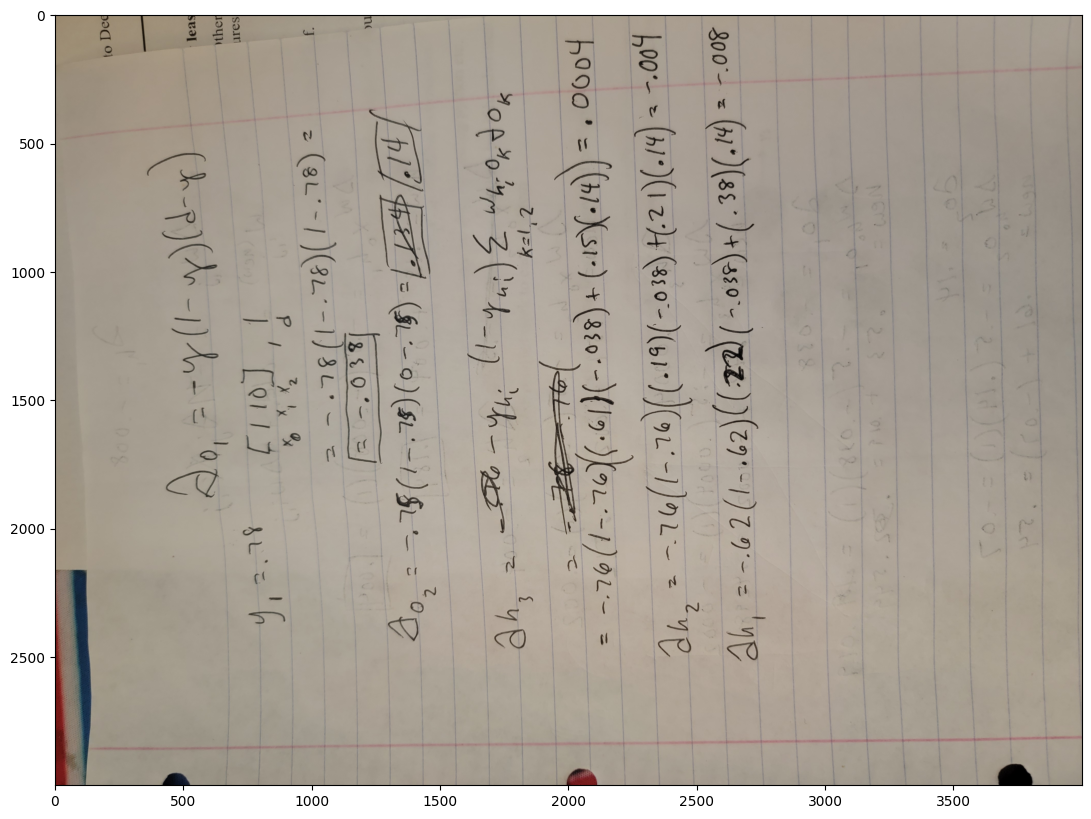

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img3)


























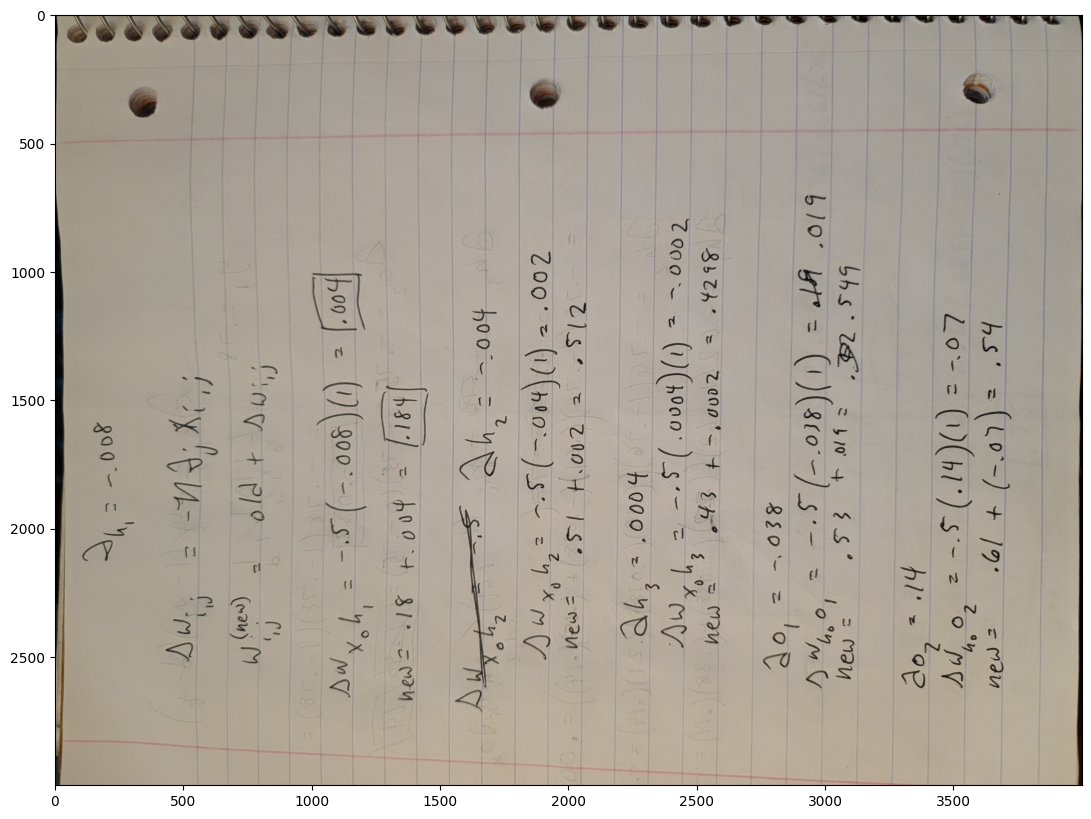

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img4)




























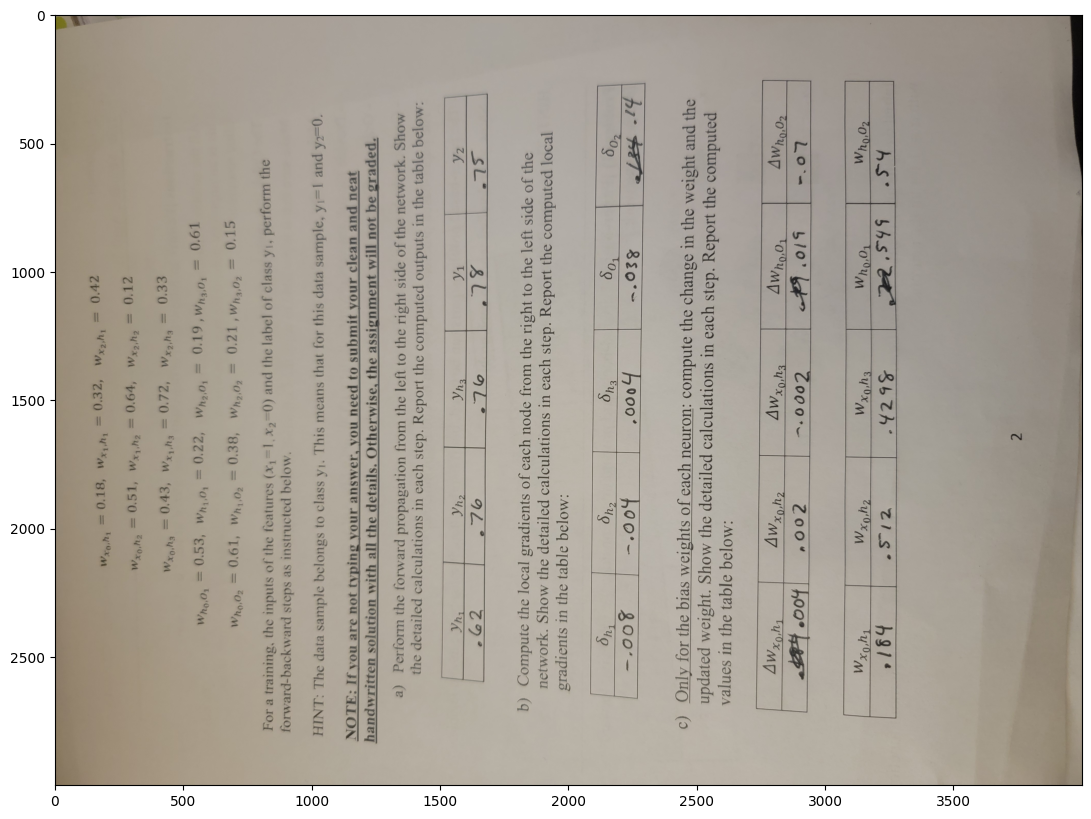

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img5)




























In [ ]:
def plot_curve(accuracy_train, loss_train):
  epochs = np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs, accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Categorical Cross Entropy Loss')
  plt.title('Training Loss')

  plt.show()

def feat_extract(images):

  width=images.shape[1]
  height = images.shape[2]
  features = np.zeros((images.shape[0],4))
  features_temp = np.sum(images[:, 0:int(width/2), 0:int(height/2)], axis = 2) #q0
  features[:, 0] = np.sum(features_temp, axis=1)/(width*height/4)
  features_temp = np.sum(images[:, 0:int(width/2), int(height/2):], axis = 2) #q1
  features[:, 1] = np.sum(features_temp, axis=1)/(width*height/4)
  features_temp = np.sum(images[:, int(width/2):, 0:int(height/2)], axis = 2) #q2
  features[:, 2] = np.sum(features_temp, axis=1)/(width*height/4)
  features_temp = np.sum(images[:, int(width/2):, int(height/2):], axis = 2) #q3
  features[:, 3] = np.sum(features_temp, axis=1)/(width*height/4)
  return features

# def feat_plot(features, labels, classes):
#   for class_i in classes:
#     plt.plot(features[labels[:]==classes[class_i], 0],
#     features[labels[:]==classes[class_i],1], 'o', markersize=15)
#     plt.xlabel('x: feature 1')
#     plt.xlabel('y: feature 2')
#     plt.legend(['Class' + str(classes[class_i]) for class_i in classes])
#     plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

classes = [0,1,2]


#Creating the network of various sizes and complexities using tanh for hidden layers and softmax for output layer
model = Sequential()
model.add(Dense(input_dim=4, units = 128, activation = 'tanh'))
model.add(Dense(units = 64, activation = 'tanh'))
model.add(Dense(units = len(classes), activation = 'softmax'))
opt = tf.keras.optimizers.SGD(learning_rate = .0001)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

#loading mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#selecting digits 0,1,2 along with labels for training and testing sets
x_train_012 = x_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2)), 0:28, 0:28]
y_train_012 = y_train[np.logical_or.reduce((y_train == 0, y_train == 1, y_train == 2))]
x_test_012 = x_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2)), 0:28, 0:28]
y_test_012 = y_test[np.logical_or.reduce((y_test == 0, y_test == 1, y_test == 2))]

#shuffling data
num_train_img = x_train_012.shape[0]
train_ind = np.arange(0,num_train_img)
train_ind_s = np.random.permutation(train_ind)
x_train_012 = x_train_012[train_ind_s, :, :]
y_train_012 = y_train_012[train_ind_s]

#seperating 20% of training data into validation data
x_val_012 = x_train_012[0:int(num_train_img * 0.2), :, :]
y_val_012 = y_train_012[0:int(num_train_img * 0.2)]
x_train_012 = x_train_012[int(num_train_img * 0.2): ,: ,: ]
y_train_012 = y_train_012[int(num_train_img * 0.2):]

In [ ]:
#feature extraction for training, testing, and validation data
feature_train = feat_extract(x_train_012)
feature_val = feat_extract(x_val_012)
feature_test = feat_extract(x_test_012)

#conversion of labels to binary class matrices
y_train_012_c = to_categorical(y_train_012, len(classes))
y_val_012_c = to_categorical(y_val_012, len(classes))
y_test_012_c = to_categorical(y_test_012, len(classes))

#fitting the model
history = model.fit(feature_train, y_train_012_c, batch_size = 16, epochs = 30)



Epoch 1/30
932/932 [==============================] - 3s 3ms/step - loss: 0.9398 - accuracy: 0.6038
Epoch 2/30
932/932 [==============================] - 3s 3ms/step - loss: 0.6730 - accuracy: 0.8133
Epoch 3/30
932/932 [==============================] - 3s 3ms/step - loss: 0.5882 - accuracy: 0.8400
Epoch 4/30
932/932 [==============================] - 3s 4ms/step - loss: 0.5364 - accuracy: 0.8542
Epoch 5/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4976 - accuracy: 0.8591
Epoch 6/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4667 - accuracy: 0.8654
Epoch 7/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4415 - accuracy: 0.8684
Epoch 8/30
932/932 [==============================] - 4s 4ms/step - loss: 0.4220 - accuracy: 0.8722
Epoch 9/30
932/932 [==============================] - 3s 3ms/step - loss: 0.4067 - accuracy: 0.8733
Epoch 10/30
932/932 [==============================] - 3s 3ms/step - loss: 0.3939 - accuracy: 0.8750

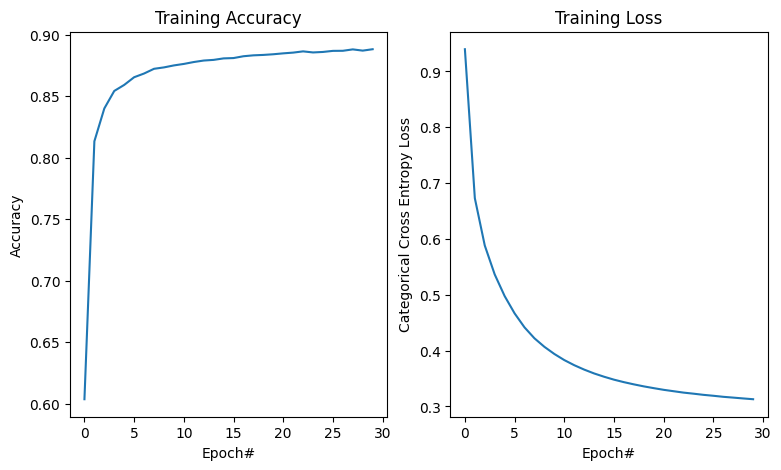

In [ ]:
#plotting accuracy and loss curves
plt.figure(figsize = [9,5])
acc_curve = np.array(history.history['accuracy'])
loss_curve = np.array(history.history['loss'])
plot_curve(acc_curve, loss_curve)

In [ ]:
#evaluating model for loss and accuracy on training data
score = model.evaluate(feature_train, y_train_012_c)
print('Total loss on training set: ', score[0])
print('Accuracy of training set: ', score[1])

#evaluating model for loss and accuracy on validation data
score = model.evaluate(feature_val, y_val_012_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

466/466 [==============================] - 2s 3ms/step - loss: 0.3124 - accuracy: 0.8866
Total loss on training set:  0.3124464452266693
Accuracy of training set:  0.8866366744041443
117/117 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8894
Total loss on validation set:  0.3102758824825287
Accuracy of validation set:  0.8893662691116333


In [ ]:
#evaluating final model on testing data
score = model.evaluate(feature_test, y_test_012_c)
print('Total loss on validation set: ', score[0])
print('Accuracy of validation set: ', score[1])

99/99 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8783
Total loss on validation set:  0.32829877734184265
Accuracy of validation set:  0.8782967925071716


Question d part ii: I chose the categorical cross entropy loss function because it is widely used, and capable of multi-class classification, unlike the binary cross entropy function.

Question f: With all of these different neural networks, each graph appeared reasonably smooth. That being said, the more intricate networks were able to produce a slightly lower cost along with a slightly greater accuracy (except for the model with only 16 neurons, that one performed very poorly and exhibited relatively erratic behavior). Considering that the differences between the various networks is so minimal, I would wager that in this specific instance, I would select the model with 1 layer of 128 nodes. The improvement of the more complex networks with two layers provided minimal improvement in accuracy. This leads me to believe that training past this point, or providing additional complexity would only be overfitting the data and reduce the generalizability of the network.

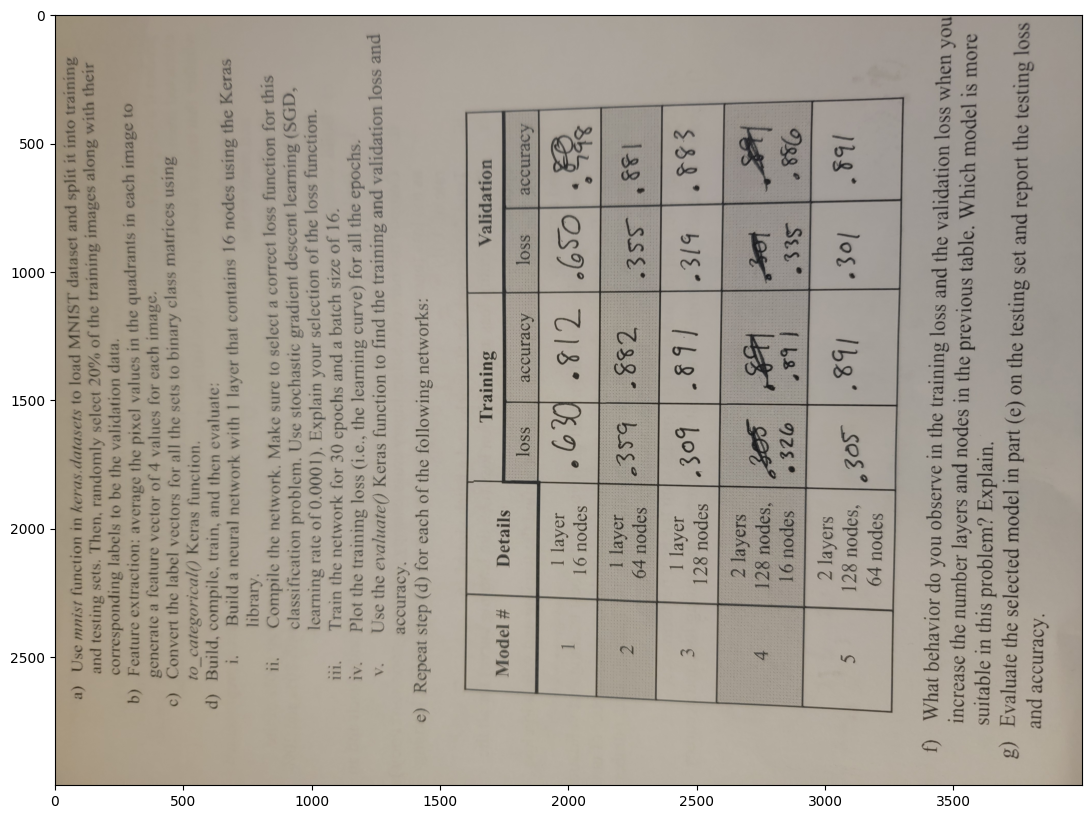

In [ ]:
plt.figure(figsize = (15, 10))
plt.imshow(img6)